In [1]:
# 线性模型容易出错
# 我们尝试加入一个或者多个隐藏层， 使其能处理更普遍的函数关系类型
# 要做到这一点，最简单的方法是将许多全连接层堆叠在一起。 每一层都输出到上面的层，直到生成最后的输出
# 我们可以把前L - 1层看作表示，把最后一层看作线性预测器。 这种架构通常称为多层感知机（multilayer perceptron），通常缩写为MLP

In [2]:
# 输入层 4
# 隐藏层 5
# 输出层 3

In [3]:
# 我们说这样的MLP是两层的全连接
# 我们用 R(n*d)来表示n个样本的小批量, 每个样本有d个特征
# 对于具有h个隐藏单元的单隐藏层MLP, 用 H 属于 R(n*h)表示隐藏层的输出
# 因为全连接，我们有 隐藏层权重W属于 R(d*h), 以及 b属于 R(1*h); 输出层权重 W属于R(h*q), 以及b属于R(1*q)

In [4]:
# 我们得到好处了吗, 并没有, 只是徒增计算量
# 为什么? 因为仿射函数 + 仿射函数 = 仿射函数, 没有任何意义
# 但是如果每一层添加非线性的激活函数, 这个模型就不可能退回线性

In [10]:
%matplotlib inline
import torch
from d2l import torch as d2l
print(torch.__version__)

2.4.1


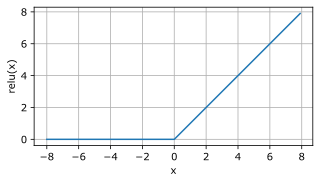

In [6]:
# RELU(x) = max(x, 0)

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True) # arange(start,end,step)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

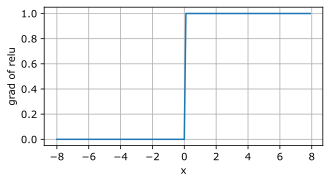

In [7]:
# retain_graph的作用是保留计算图,用来再一次地backward
# backward(gradient, retain_graph = False, create_graph = False)默认设置
# backward要求反向传播的y是一个标量, 所以gradient决定了y要怎么处理成一个标量
# 可以理解为最后的标量=y*gradient,从哪个方向求和,ones_like在这里等同于.sum()
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

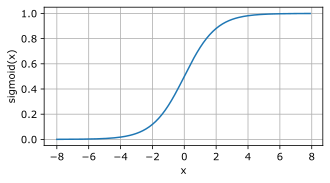

In [8]:
# sigmoid函数将输入变换为区间(0, 1)上的输出。 因此，sigmoid通常称为挤压函数
# 公式为 1 / (1 + exp(-x))

y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

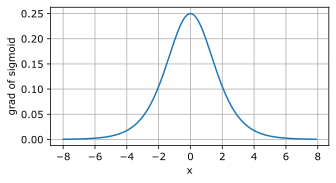

In [11]:
x.grad.zero_() # .grad.data.zero 属于tensor的方法, 位列torch这个顶层包中
# .grad_zero() 属于nn.Module的optimizer的方法
# 以前为了防止某些底层问题,grad.data.zero可以绕过计算图,不被autograd干扰，直接修改数据
# 但是现在更推荐使用grad.zero_(), 因为1.data太原子级,对图不透明;2.1.7+版本后对梯度缓存更智能,不会报错了

y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

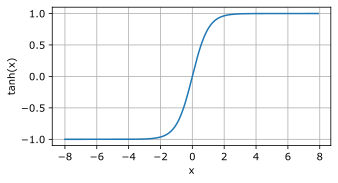

In [12]:
# tanh双曲正切函数, 也能把输入压缩到 -1,1 的范围上
# 公式为 (1 - exp(-2x)) / (1 + exp(-2x))

y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

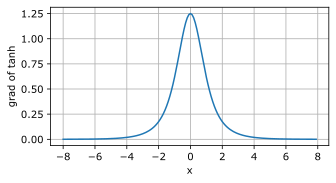

In [13]:
y.backward(torch.ones_like(y))
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))